In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset

import pandas, random, numpy
import matplotlib.pyplot as plt

# CUDA를 사용할 수 있는지 확인하고 장치 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
class MnistDataset(Dataset):
    def __init__(self, csv_file):
        self.data_df = pandas.read_csv(csv_file, header=None)

    def __len__(self):
        return len(self.data_df)

    def __getitem__(self, index):
        label = self.data_df.iloc[index, 0]

        target = torch.zeros((10))
        target[label] = 1.0

        # 텐서를 CUDA로 이동
        image_values = torch.FloatTensor(self.data_df.iloc[index, 1:].values / 255.0).to(device)
        return label, image_values, target

    def plot_image(self, index):
        img = self.data_df.iloc[index, 1:].values.reshape(28, 28)
        plt.title("label = " + str(self.data_df.iloc[index, 0]))
        plt.imshow(img, interpolation='none', cmap='Blues')
        pass

mnist_dataset = MnistDataset('/content/drive/MyDrive/mnist_train.csv')
len(mnist_dataset)

60000

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.LeakyReLU(0.02),
            nn.Dropout(0.3),

            nn.Linear(1024, 512),
            nn.LeakyReLU(0.02),
            nn.Dropout(0.3),

            nn.Linear(512, 256),
            nn.LeakyReLU(0.02),
            nn.Dropout(0.3),

            nn.Linear(256, 128),
            nn.LeakyReLU(0.02),
            nn.Dropout(0.3),

            nn.Linear(128, 1),
            nn.Sigmoid()
        )

        self.loss_function = nn.BCELoss()

        self.optimizer = torch.optim.Adam(self.parameters(), lr=0.0001)

        self.counter = 0
        self.progress = []

    def forward(self, inputs):
        return self.model(inputs)

    def train(self, inputs, targets):
        outputs = self.forward(inputs)
        loss = self.loss_function(outputs, targets)

        self.counter += 1
        if self.counter % 10 == 0:
            self.progress.append(loss.item())

        if self.counter % 1000 == 0:
            print("counter =", self.counter)

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16, 8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))


In [ ]:
def generate_random(size):
    random_data = torch.cuda.FloatTensor(size).uniform_(0, 1)
    return random_data

In [ ]:
D = Discriminator().to(device)

for label, image_data_tensor, target_tensor in mnist_dataset:
    D.train(image_data_tensor, torch.FloatTensor([1.0]).to(device))
    D.train(generate_random(784), torch.FloatTensor([0.0]).to(device))

counter = 1000
counter = 2000
counter = 3000
counter = 4000
counter = 5000
counter = 6000
counter = 7000
counter = 8000
counter = 9000
counter = 10000
counter = 11000
counter = 12000
counter = 13000
counter = 14000
counter = 15000
counter = 16000
counter = 17000
counter = 18000
counter = 19000
counter = 20000
counter = 21000
counter = 22000
counter = 23000
counter = 24000
counter = 25000
counter = 26000
counter = 27000
counter = 28000
counter = 29000
counter = 30000
counter = 31000
counter = 32000
counter = 33000
counter = 34000
counter = 35000
counter = 36000
counter = 37000
counter = 38000
counter = 39000
counter = 40000
counter = 41000
counter = 42000
counter = 43000
counter = 44000
counter = 45000
counter = 46000
counter = 47000
counter = 48000
counter = 49000
counter = 50000
counter = 51000
counter = 52000
counter = 53000
counter = 54000
counter = 55000
counter = 56000
counter = 57000
counter = 58000
counter = 59000
counter = 60000
counter = 61000
counter = 62000
counter = 63000
c

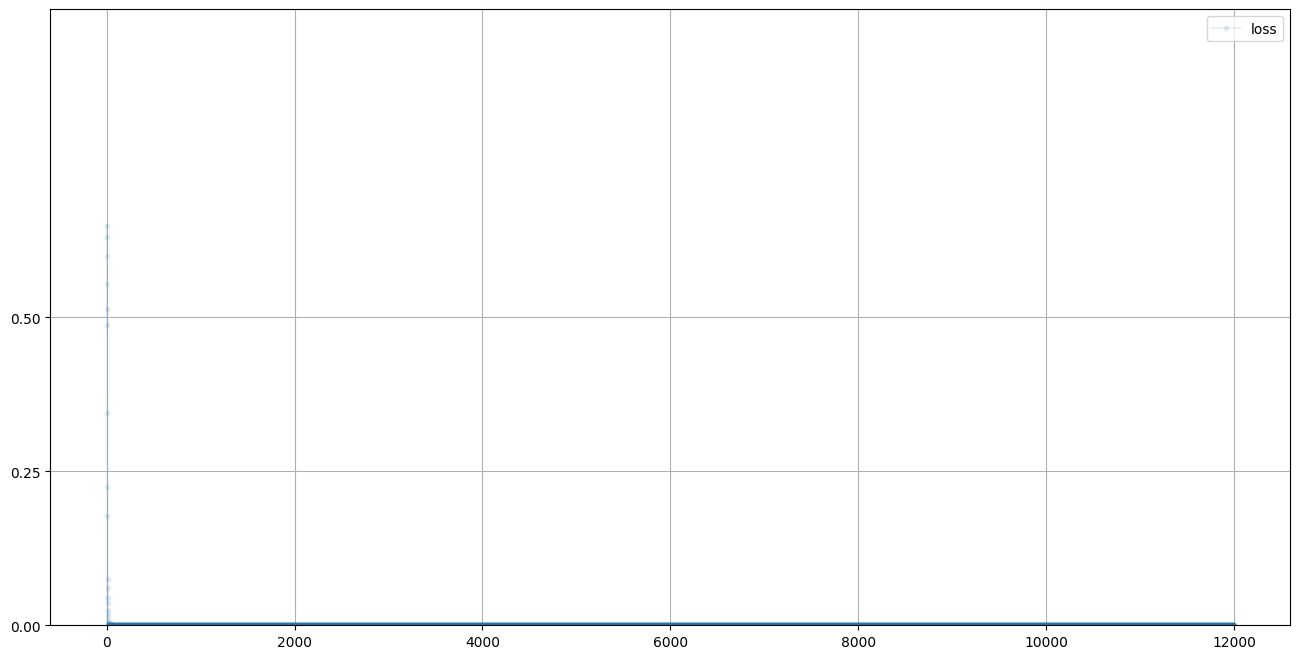

In [ ]:
D.plot_progress()

In [ ]:
for i in range(4):
    image_data_tensor = mnist_dataset[random.randint(0, 60000)][1].to(device)
    print(D.forward(image_data_tensor).item())

for i in range(4):
    print(D.forward(generate_random(784)).item())

1.0
1.0
1.0
1.0
1.8158803566105382e-20
7.130956970335916e-18
5.7131361580991595e-21
1.0987282085044869e-17


In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(1, 128),
            nn.LeakyReLU(0.02),

            nn.Linear(128, 256),
            nn.LeakyReLU(0.02),

            nn.Linear(256, 512),
            nn.LeakyReLU(0.02),

            nn.Linear(512, 1024),
            nn.LeakyReLU(0.02),

            nn.Linear(1024, 784),
            nn.Tanh()
        )

        self.optimizer = torch.optim.Adam(self.parameters(), lr=0.0001)

        self.counter = 0
        self.progress = []

    def forward(self, inputs):
        return self.model(inputs)

    def train(self, D, inputs, targets):
        g_output = self.forward(inputs)
        d_output = D.forward(g_output)

        loss = D.loss_function(d_output, targets)

        self.counter += 1
        if self.counter % 10 == 0:
            self.progress.append(loss.item())

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16, 8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))

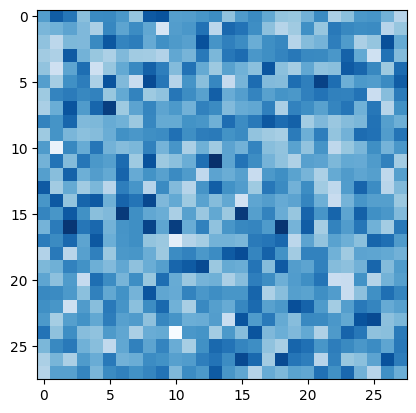

In [ ]:
G = Generator().to(device)
output = G.forward(generate_random(1))
img = output.detach().cpu().numpy().reshape(28, 28)
plt.imshow(img, interpolation='none', cmap='Blues')

In [ ]:
D = Discriminator().to(device)
G = Generator().to(device)

epoch = 4

for epochs in range(epoch):
    for label, image_data_tensor, target_tensor in mnist_dataset:
        D.train(image_data_tensor, torch.FloatTensor([1.0]).to(device))

        D.train(G.forward(generate_random(1)).detach(), torch.FloatTensor([0.0]).to(device))

        G.train(D, generate_random(1), torch.FloatTensor([1.0]).to(device))

        pass
    pass

counter = 1000
counter = 2000
counter = 3000
counter = 4000
counter = 5000
counter = 6000
counter = 7000
counter = 8000
counter = 9000
counter = 10000
counter = 11000
counter = 12000
counter = 13000
counter = 14000
counter = 15000
counter = 16000
counter = 17000
counter = 18000
counter = 19000
counter = 20000
counter = 21000
counter = 22000
counter = 23000
counter = 24000
counter = 25000
counter = 26000
counter = 27000
counter = 28000
counter = 29000
counter = 30000
counter = 31000
counter = 32000
counter = 33000
counter = 34000
counter = 35000
counter = 36000
counter = 37000
counter = 38000
counter = 39000
counter = 40000
counter = 41000
counter = 42000
counter = 43000
counter = 44000
counter = 45000
counter = 46000
counter = 47000
counter = 48000
counter = 49000
counter = 50000
counter = 51000
counter = 52000
counter = 53000
counter = 54000
counter = 55000
counter = 56000
counter = 57000
counter = 58000
counter = 59000
counter = 60000
counter = 61000
counter = 62000
counter = 63000
c

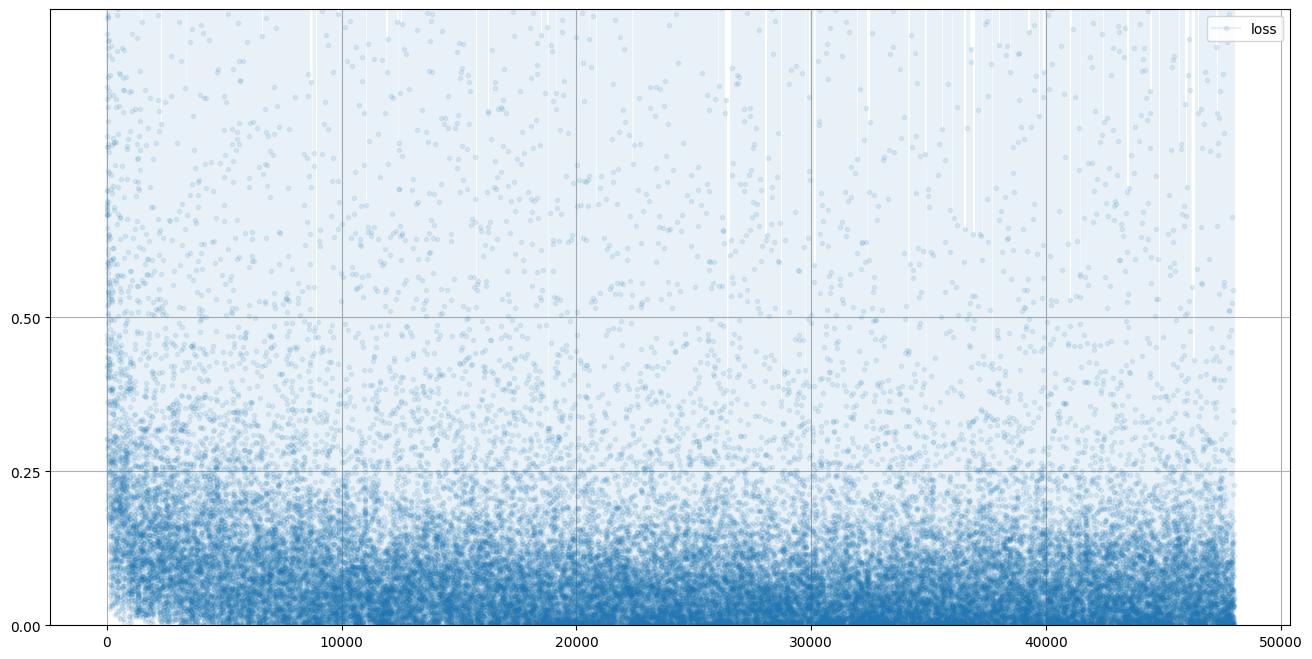

In [ ]:
D.plot_progress()

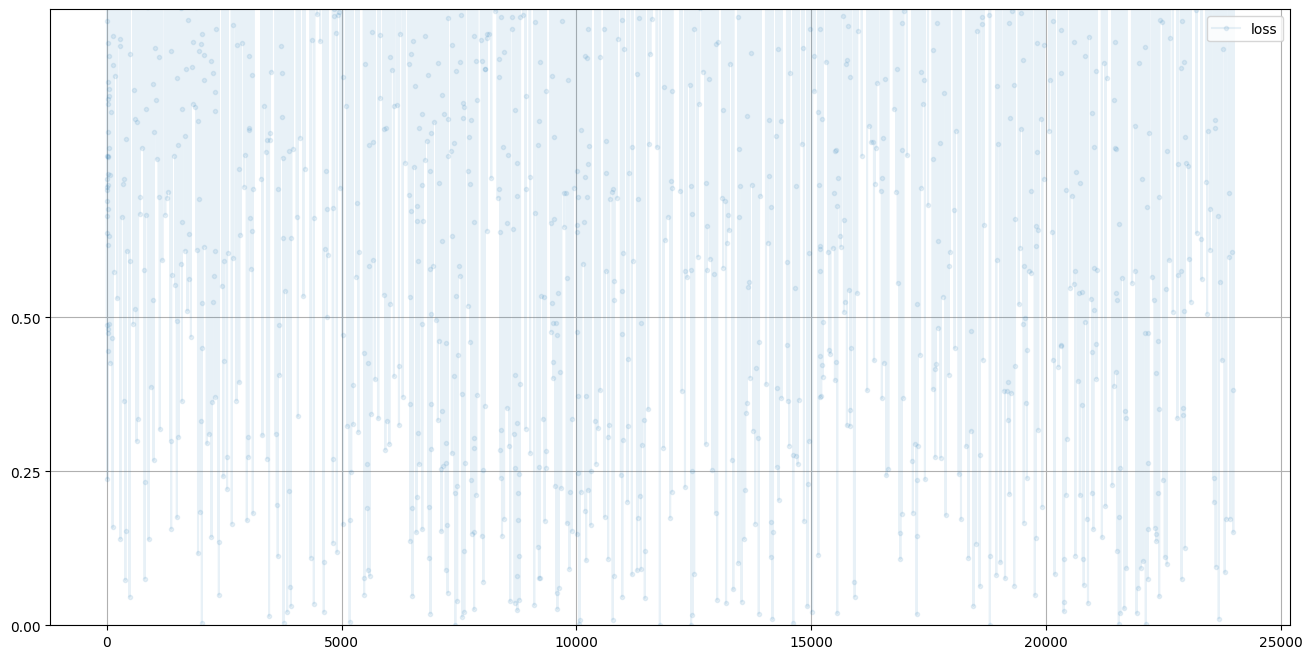

In [ ]:
G.plot_progress()

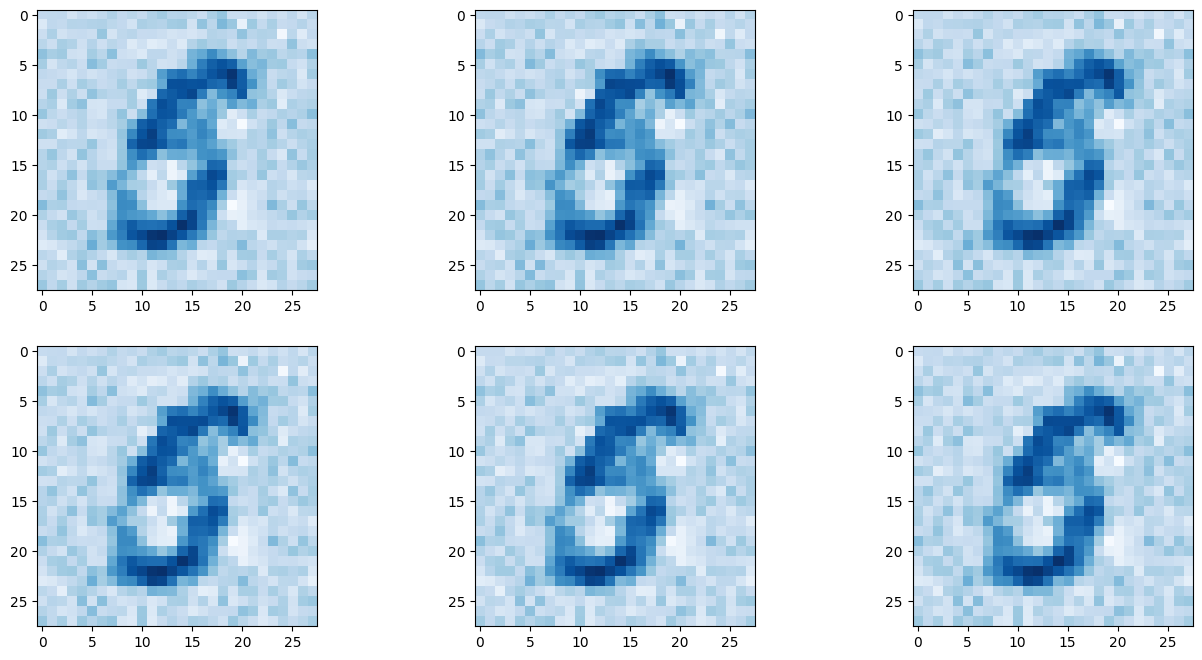

In [ ]:
f, axarr = plt.subplots(2,3, figsize = (16,8))
for i in range(2):
  for j in range(3):
    output = G.forward(generate_random(1))
    output = output.detach().cpu().numpy().reshape(28, 28)

    axarr[i,j].imshow(output, interpolation = 'none', cmap = 'Blues')

# 사용한 성능 향상 기법
1. 활성화함수 LeakyReLU 사용
2. Dropout 기법 적용
3. 손실함수 BCELoss 사용
4. Adam optimizer 사용
5. 모델 층 늘리기